In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.colors as col
import matplotlib.cm as cm
import seaborn as sns
import re

!pip install mplcursors
!pip install mpldatacursor

%matplotlib notebook

file_nl = 'annual_av_for_NL_1901_2022.csv'
file_it = 'annual_av_for_Italy_1901_2022.csv'
file_ua = 'annual_av_for_Ukraine_1901_2022.csv'
#'Category' - year, 'Annual Mean' - mean for each year
df_nl = pd.read_csv(file_nl)
df_it = pd.read_csv(file_it)
df_ua = pd.read_csv(file_ua)
df_global = pd.read_csv('global.txt')
df_global.to_csv('global.csv', index = None)
df_global = df_global.iloc[::-1]

<IPython.core.display.Javascript object>


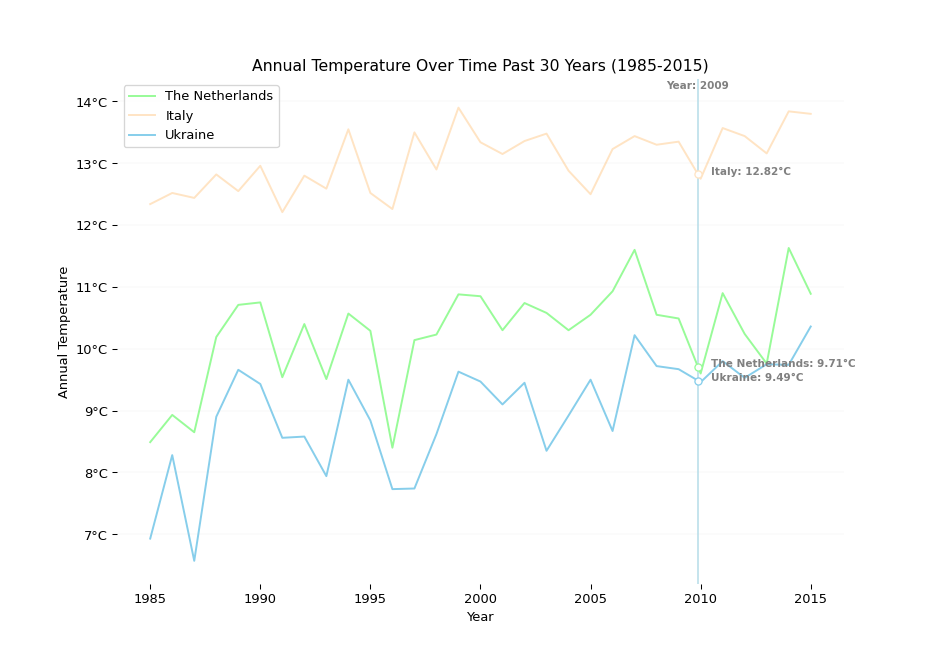

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Assuming you have loaded your data frames df_nl, df_it, and df_ua here

# Getting values for 1922-2022 to make a conclusion for a change over the past century
df_nl_filtered = df_nl[(df_nl['Category'] >= 1985) & (df_nl['Category'] <= 2015)]
df_it_filtered = df_it[(df_it['Category'] >= 1985) & (df_it['Category'] <= 2015)]
df_ua_filtered = df_ua[(df_ua['Category'] >= 1985) & (df_ua['Category'] <= 2015)]

# Create interpolated functions
nl_interp = interp1d(df_nl_filtered['Category'], df_nl_filtered['Annual Mean'], kind='linear', fill_value='extrapolate')
it_interp = interp1d(df_it_filtered['Category'], df_it_filtered['Annual Mean'], kind='linear', fill_value='extrapolate')
ua_interp = interp1d(df_ua_filtered['Category'], df_ua_filtered['Annual Mean'], kind='linear', fill_value='extrapolate')

fig, ax = plt.subplots(figsize=(10, 7))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_color('lightgrey')
ax.spines['bottom'].set_color('lightgrey')

nl_line, = plt.plot(df_nl_filtered['Category'], df_nl_filtered['Annual Mean'], label='The Netherlands', color='palegreen', alpha=1)
it_line, = plt.plot(df_it_filtered['Category'], df_it_filtered['Annual Mean'], label='Italy', color='bisque', alpha=1)
ua_line, = plt.plot(df_ua_filtered['Category'], df_ua_filtered['Annual Mean'], label='Ukraine', color='skyblue', alpha=1)

ax.axhline(y=10, color='silver', alpha=0.05)
ax.axhline(y=9, color='silver', alpha=0.05)
ax.axhline(y=8, color='silver', alpha=0.05)
ax.axhline(y=7, color='silver', alpha=0.05)
ax.axhline(y=11, color='silver', alpha=0.05)
ax.axhline(y=12, color='silver', alpha=0.05)
ax.axhline(y=13, color='silver', alpha=0.05)
ax.axhline(y=14, color='silver', alpha=0.05)

plt.xlabel('Year')
plt.ylabel('Annual Temperature')
plt.title('Annual Temperature Over Time Past 30 Years (1985-2015)')
ax.legend()
years = [7, 8, 9, 10, 11, 12, 13, 14]
plt.yticks(years, [f'{year}°C' for year in years], rotation=0, ha='right')

vertical_line = None  # Variable to keep track of the vertical line
dots = {'Italy': None, 'The Netherlands': None, 'Ukraine': None}
annotations = {'Italy': None, 'The Netherlands': None, 'Ukraine': None}
year_annotation = None

# Set initial x-axis limits
initial_xlim = ax.get_xlim()

def on_drag(event):
    global vertical_line, dots, annotations, year_annotation
    
    if event.inaxes == ax:
        x, y = event.xdata, event.ydata

        # Remove the previous vertical line, dots, and annotations
        if vertical_line:
            vertical_line.remove()
        for dot in dots.values():
            if dot:
                dot.remove()
        for annotation in annotations.values():
            if annotation:
                annotation.remove()
        if year_annotation:
            year_annotation.remove()

        vertical_line = ax.axvline(x=x, color='lightblue', alpha=0.7)

        # Use interpolation for smoother movement
        nl_point = nl_interp(x)
        it_point = it_interp(x)
        ua_point = ua_interp(x)

        nl_line.set_markerfacecolor('red' if nl_point > 10 else 'green')
        it_line.set_markerfacecolor('red' if it_point > 10 else 'green')
        ua_line.set_markerfacecolor('red' if ua_point > 10 else 'green')

        # Add dots
        dots['Italy'] = ax.scatter(x, it_point, color='white', edgecolor='bisque', s=30,  zorder=5)
        dots['The Netherlands'] = ax.scatter(x, nl_point, color='white', edgecolor='palegreen', s=30,  zorder=5)
        dots['Ukraine'] = ax.scatter(x, ua_point, color='white', edgecolor='skyblue', s=30,  zorder=5)

                                                   # Annotate temperature info near each dot
        annotations['Italy'] = ax.annotate(f"Italy: {it_point:.2f}°C", (x, it_point), textcoords="offset points", xytext=(10,0), ha='left', fontsize=8, color='grey', fontweight='bold')
        annotations['The Netherlands'] = ax.annotate(f"The Netherlands: {nl_point:.2f}°C", (x, nl_point), textcoords="offset points", xytext=(10,0), ha='left', fontsize=8, color='grey', fontweight='bold')
        annotations['Ukraine'] = ax.annotate(f"Ukraine: {ua_point:.2f}°C", (x, ua_point), textcoords="offset points", xytext=(10,0), ha='left', fontsize=8, color='grey', fontweight='bold')

        # Annotate year at the top
        year_annotation = ax.annotate(f"Year: {int(x)}", xy=(x, 14), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='grey', fontweight='bold')

        # Update the legend
        ax.legend()

        # Set x-axis limits to prevent deformation
        new_xlim = ax.get_xlim()
        if new_xlim != initial_xlim:
            ax.set_xlim(initial_xlim)

fig.canvas.mpl_connect('motion_notify_event', on_drag)
plt.show()



<IPython.core.display.Javascript object>


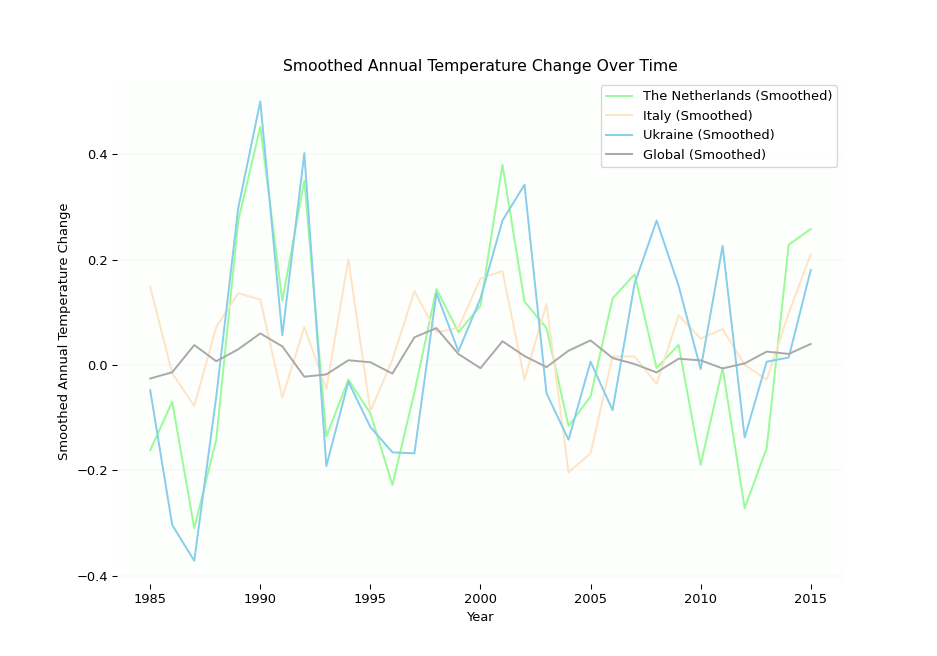

In [7]:
df_nl['Annual Change'] = df_nl['Annual Mean'].diff()
df_it['Annual Change'] = df_it['Annual Mean'].diff()
df_ua['Annual Change'] = df_ua['Annual Mean'].diff()
df_global['Annual Change'] = df_global[df_global['Source'] == 'GCAG']['Mean'].diff()

# Calculate smoothed versions using a moving average (window size can be adjusted)
window_size = 5
df_nl['Smoothed Change'] = df_nl['Annual Change'].rolling(window=window_size).mean()
df_it['Smoothed Change'] = df_it['Annual Change'].rolling(window=window_size).mean()
df_ua['Smoothed Change'] = df_ua['Annual Change'].rolling(window=window_size).mean()
df_global['Smoothed Change'] = df_global[df_global['Source'] == 'GCAG']['Annual Change'].rolling(window=window_size).mean()
#getting values for 1922-2022 to make a conclusion for a change over past century
df_nl_filtered = df_nl[(df_nl['Category'] >= 1985) & (df_nl['Category'] <= 2015)]
df_it_filtered = df_it[(df_it['Category'] >= 1985) & (df_it['Category'] <= 2015)]
df_ua_filtered = df_ua[(df_ua['Category'] >= 1985) & (df_ua['Category'] <= 2015)]
df_global_filtered = df_global[(df_global['Source'] == 'GCAG') & (df_global['Year']>=1985) & (df_global['Year']<=2015)]


fig, ax = plt.subplots(figsize=(10, 7))
ax.set_facecolor('#fdfffd')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('lightgrey')
ax.spines['bottom'].set_color('lightgrey')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Plot smoothed data
plt.plot(df_nl_filtered['Category'], df_nl_filtered['Smoothed Change'], label='The Netherlands (Smoothed)', color='palegreen', alpha=1)
plt.plot(df_it_filtered['Category'], df_it_filtered['Smoothed Change'], label='Italy (Smoothed)', color='bisque', alpha=1)
plt.plot(df_ua_filtered['Category'], df_ua_filtered['Smoothed Change'], label='Ukraine (Smoothed)', color='skyblue', alpha=1)
plt.plot(df_global_filtered['Year'], df_global_filtered['Smoothed Change'], label='Global (Smoothed)', color='darkgrey')
ax.axhline(y=-0.4, color='silver', alpha = 0.05)
ax.axhline(y=0.4, color='silver', alpha = 0.05)
ax.axhline(y=-0.2, color='silver', alpha = 0.05)
ax.axhline(y=0.2, color='silver', alpha = 0.05)
ax.axhline(y=0, color='silver', alpha = 0.05)

plt.xlabel('Year')
plt.ylabel('Smoothed Annual Temperature Change')
plt.title('Smoothed Annual Temperature Change Over Time')
plt.legend()
plt.show()
